In [114]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [115]:
data=pd.read_csv('churn.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [117]:
#MISSING VALUES
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [118]:
data=data.fillna(0)
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [119]:
#Custormers who churned and who did not churn
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Churned vs not Churned Customers')

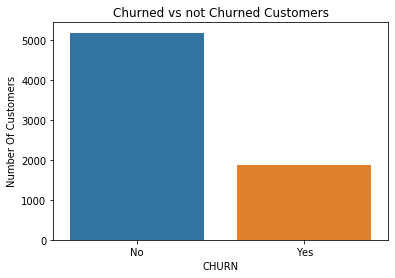

In [120]:
import seaborn as sns
sns.countplot(data['Churn'])
plt.xlabel("CHURN")
plt.ylabel("Number Of Customers")
plt.title("Churned vs not Churned Customers")

In [121]:
#%OF THE CUSTORMERS WHO STAYED OR CHURNED
cust_stayed=data[data.Churn=='No'].shape[0]
cust_churned=data[data.Churn=='Yes'].shape[0]
Per_cust_stayed=cust_stayed/(cust_churned+cust_stayed)*100
Per_cust_churned=cust_churned/(cust_churned+cust_stayed)*100

In [122]:
print('The persentageo of the customers who churned is equal to  %3.2f'%(Per_cust_churned),'%' )

The persentageo of the customers who churned is equal to  26.54 %


In [123]:
print('The persentageo of the customers who did not churn is equal to  %3.2f'%(Per_cust_stayed),'%' )

The persentageo of the customers who did not churn is equal to  73.46 %


In [124]:
#From the data above,most of the custormers did not leave the campany 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002909E6B8908>,
      dtype=object)

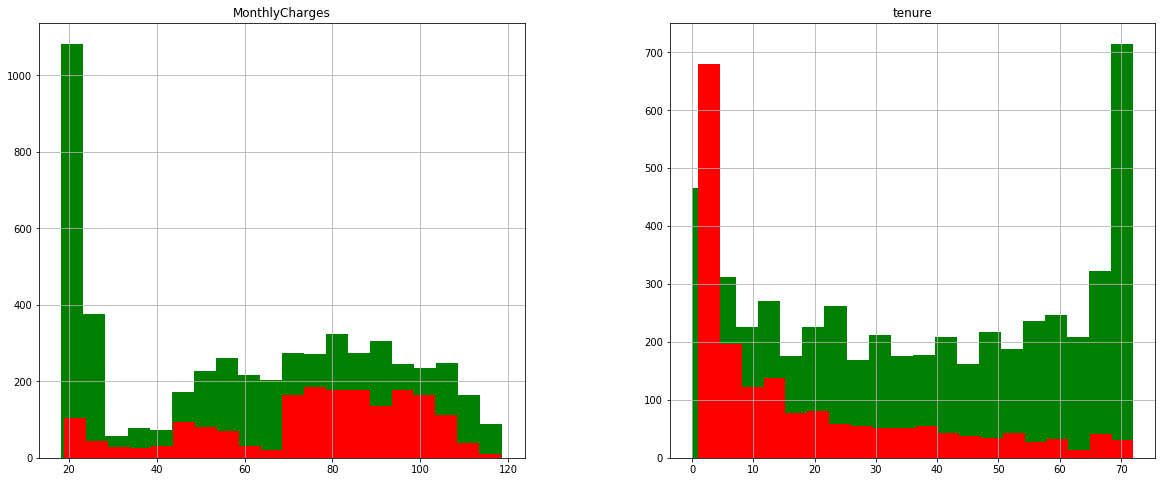

In [125]:
numeric_col=['tenure','MonthlyCharges']
fig,ax=plt.subplots(1,2,figsize=(20,8))
data[data.Churn=='No'][numeric_col].hist(bins=20,color='green',ax=ax)
data[data.Churn=='Yes'][numeric_col].hist(bins=20,color='red',ax=ax)

Text(0.5, 1.0, 'Churn visualization with gender')

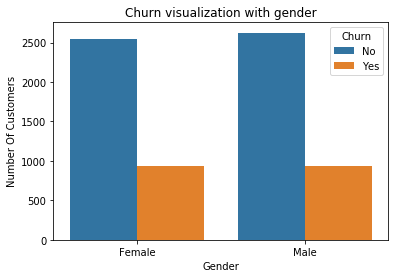

In [126]:
#Churn visualization with gender
sns.countplot(x='gender',hue='Churn',data=data)
plt.xlabel("Gender")
plt.ylabel("Number Of Customers")
plt.title("Churn visualization with gender")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002909EAC1BC8>,
      dtype=object)

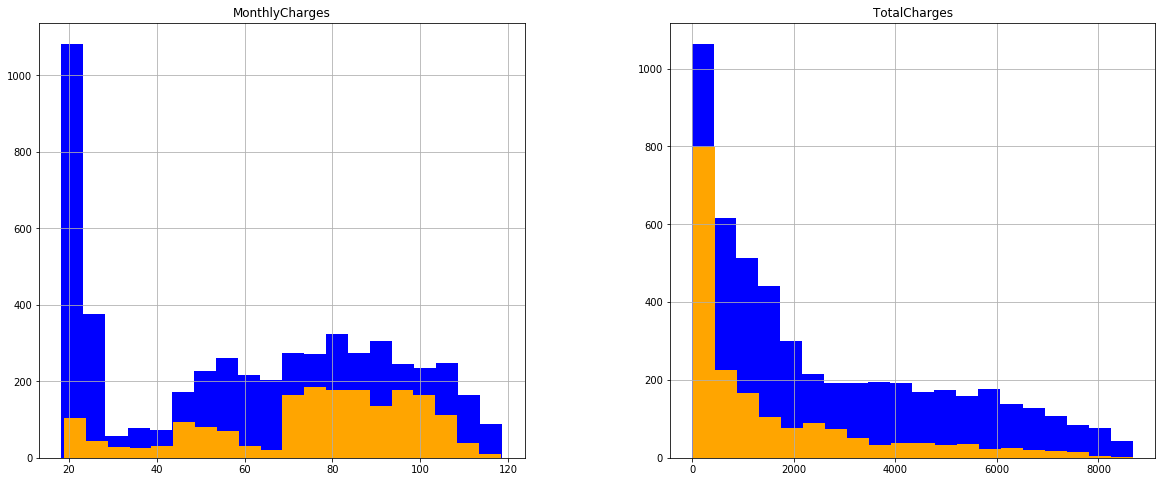

In [127]:
#Churn visualization with monthly and total charges
numeric_col=['MonthlyCharges','TotalCharges']
fig,ax=plt.subplots(1,2,figsize=(20,8))
data[data.Churn=='No'][numeric_col].hist(bins=20,color='blue',ax=ax)
data[data.Churn=='Yes'][numeric_col].hist(bins=20,color='orange',ax=ax)

Text(0.5, 1.0, 'Customer Churn Prediction for Internet Service')

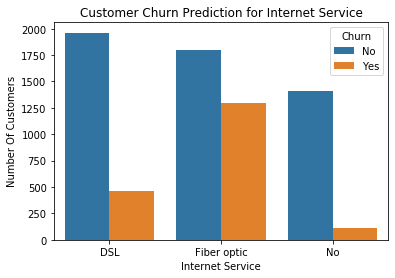

In [128]:
#Internet service
sns.countplot(x='InternetService',hue='Churn',data=data)
plt.xlabel("Internet Service")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction for Internet Service")

In [129]:
#The above graph shows that most of the customers with DSL STAYED and those with Fiber opitic churned

In [130]:
#Considering the above analysis, I can see that the only column that is useless is the customerID
df_clean= data.drop('customerID',axis=1)

In [131]:
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [132]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [133]:
df_clean.shape

(7043, 20)

In [134]:
#CHANGE THE STRING DATA INTO INTEGERS
for column in df_clean.columns:
    if df_clean[column].dtype==np.number:
        continue
    df_clean[column]=LabelEncoder().fit_transform(df_clean[column])

In [135]:
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [136]:
df_clean.shape

(7043, 20)

In [137]:
#Q1 Choosing the features for prediction
df_clean.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826178,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.374410,-0.195525


In [156]:
#Looking at the corr coef the are the features that I have choosen
feature_selcetion=['SeniorCitizen','PaperlessBilling','PaymentMethod','MultipleLines','MonthlyCharges','Churn']
df_features=df_clean[feature_selcetion]
df_features.head()

,SeniorCitizen,PaperlessBilling,PaymentMethod,MultipleLines,MonthlyCharges,Churn
0,0,1,2,1,29.85,0
1,0,0,3,0,56.95,0
2,0,1,3,0,53.85,1
3,0,0,0,1,42.30,0
4,0,1,2,0,70.70,1


In [157]:
X=df_features.iloc[:,:-1]#Features
y=df_features.iloc[:,-1]#Target

In [158]:
X.head()

,SeniorCitizen,PaperlessBilling,PaymentMethod,MultipleLines,MonthlyCharges
0,0,1,2,1,29.85
1,0,0,3,0,56.95
2,0,1,3,0,53.85
3,0,0,0,1,42.30
4,0,1,2,0,70.70


In [159]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [160]:
import xgboost as xgb

In [161]:
#Split the dataset into the training and test datasets
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)

In [162]:
xgboost_model=xgb.XGBClassifier(max_depth=5,learning_rate=0.2,n_estimators=100,verbosity=1)
#xgboost_model=xgb.train(params,train, 5000, evals = [(test, "test")], verbose_eval=100, 

In [163]:
xgboost_model.fit(X_train.values,y_train.values)
y_pred=xgboost_model.predict(X_test.values)

In [164]:
from sklearn import metrics
print("The Accuracy Score of XGBMODEL is %3.2f"%(metrics.accuracy_score(y_test.values,y_pred)*100))

The Accuracy Score of XGBMODEL is 76.37


In [165]:
# calculate scores
xgb_auc = roc_auc_score(y_test,y_pred)
print('XGB_MODEL: ROC AUC=% 3.3f' % (xgb_auc))

XGB_MODEL: ROC AUC= 0.636


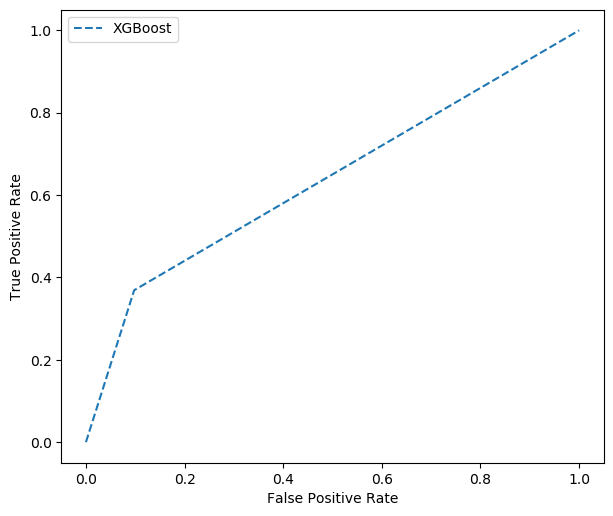

In [166]:
from sklearn.metrics import roc_curve,auc
# calculate roc curves
xgb_fpr, xgb_tpr,threshold= roc_curve(y_test,y_pred)
auc_xgb=auc(xgb_fpr,xgb_tpr)
plt.figure(figsize=(7,6),dpi=100)
# plot the roc curve for the model
plt.plot(xgb_fpr,xgb_tpr,linestyle='--', label='XGBoost'%auc_xgb)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [167]:
ar= np.array([1,0,0,1,23])

In [168]:
xgboost_model.predict([ar])

array([0])

In [108]:
import pickle
pickle_out=open("xgboost_model.pkl", 'wb')
pickle.dump(xgboost_model,pickle_out)
pickle_out.close()

TypeError: predict() takes from 2 to 5 positional arguments but 6 were given